# Overview

1) Understand the shape of the data (Histograms, box plots, etc.)
2) Data Cleaning
3) Data Exploration
4) Feature Engineering
5) Data Preprocessing for Model
6) Basic Model Building
7) Model Tuning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
training = pd.read_csv('train_titanic.csv')
testing = pd.read_csv('test_titanic.csv')


training['train_test'] = 1
testing['train_test'] = 0
testing['Survived'] = np.NaN

all_data = pd.concat([training,testing])

In [3]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [4]:
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [5]:
training.shape

(891, 13)

In [6]:
training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
train_test       0
dtype: int64

In [7]:
training['Age'].fillna(training['Age'].mean(), inplace= True)

In [8]:
training['Embarked'].fillna(training['Embarked'].mode(), inplace= True)

In [9]:
#Project planning

# Understand nature of the data .info() .describe()
# Histograms and boxplots 
# Value counts 
# Missing data 
# Correlation between the metrics 
# Explore interesting themes 
    # Wealthy survive? 
    # By location 
    # Age scatterplot with ticket price 
    # Young and wealthy Variable? 
    # Total spent? 
# Feature engineering 
# preprocess data together or use a transformer? 
    # use label for train and test   
# Scaling?

# Model Baseline 
# Model comparison with CV 

In [10]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [11]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [12]:
training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [13]:
#We have both numeric and categorical data and we will split all columns into this two types
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

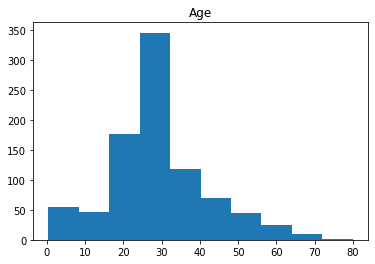

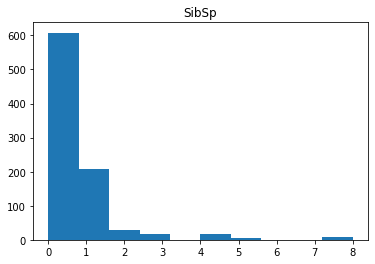

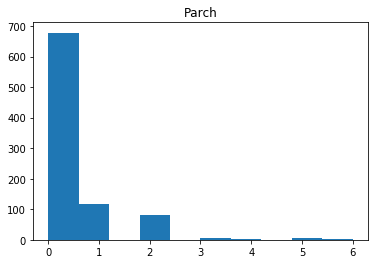

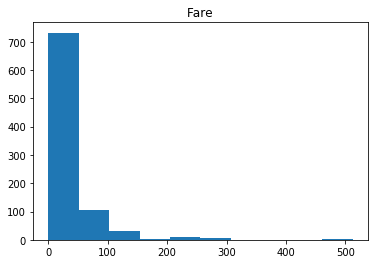

In [14]:
#distributions for all numeric variables
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.232625 -0.179191  0.091566
SibSp -0.232625  1.000000  0.414838  0.159651
Parch -0.179191  0.414838  1.000000  0.216225
Fare   0.091566  0.159651  0.216225  1.000000


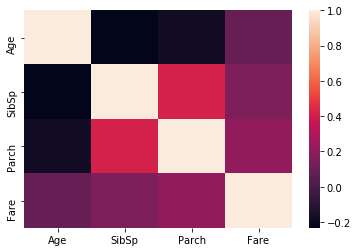

In [15]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [16]:
#Comparare survival rate across numerical data
pd.pivot_table(training,index='Survived', values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.415100,22.117887,0.329690,0.553734
1,28.549778,48.395408,0.464912,0.473684


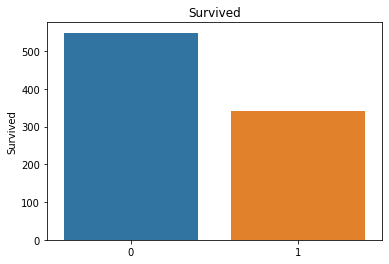

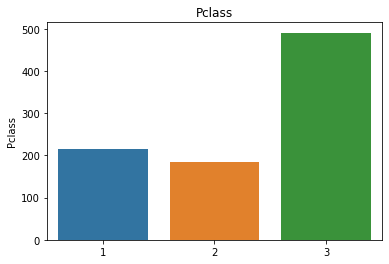

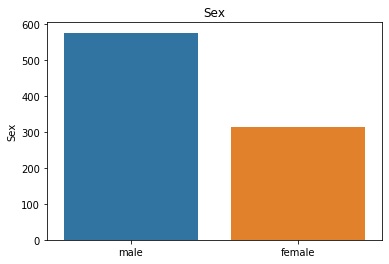

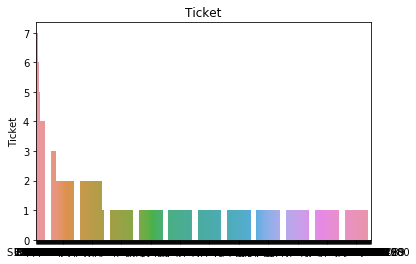

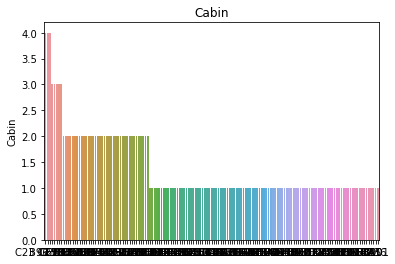

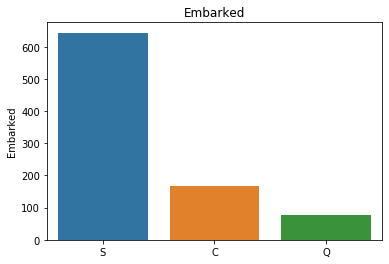

In [17]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [18]:
#Comparing survival and each of these categorical variables

print(pd.pivot_table(training, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(training, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(training, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))
print()

Sex       female  male
Survived              
0             81   468
1            233   109

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



# Feature Engineering
1) Cabin - Simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of tickets across multiple cabins (cabin_multiple) impacted survival)


2) Tickets - Do different ticket types impact survival rates?


3) Does a person's title relate to survival rates?

In [19]:
df_cat.Cabin
training['cabin_multiples'] = training.Cabin.apply(lambda x:0 if pd.isna(x) else len(x.split(' ')))
training['cabin_multiples'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiples, dtype: int64

In [20]:
pd.pivot_table(training, index='Survived', columns='cabin_multiples', values='Ticket', aggfunc='count')

cabin_multiples,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [21]:
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])

In [22]:
#Comparing survival rate by cabin
print(training.cabin_adv.value_counts())
pd.pivot_table(training,index='Survived', columns='cabin_adv',values='Name',aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [23]:
#ticket values: numeric or non-numeric
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1])>0 else 0)

In [24]:
training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [25]:
#pd.set_option('max_rows',None)
training['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
wep            3
pp             3
sotono2        2
ppp            2
scah           2
swpp           2
sca4           1
scow           1
sop            1
as             1
sp             1
sc             1
fa             1
scahbasle      1
fc             1
casoton        1
Name: ticket_letters, dtype: int64

In [26]:
#different in mumeric vs non-numeric tickets in survival rate
pd.pivot_table(training, index='Survived',columns='numeric_ticket',values='Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [27]:
#survival rate across different ticket types
pd.pivot_table(training, index='Survived', columns='ticket_letters',values='Ticket',aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [28]:
#feature engineering on person's title
training.Name.head()
training['name_title']= training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [29]:
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Don               1
Capt              1
Ms                1
the Countess      1
Jonkheer          1
Mme               1
Sir               1
Lady              1
Name: name_title, dtype: int64

# Data Preprocessing for Model

1. Drop null values from Embarked(only 2)
2. Include only relevant variables (Since we have limited data, I wantedt to exclude things like name and passenger id so that we could have a resonable number of features for our models to deal with)
3. Do categorical transform on all data. Usually we would use a transformer, but wih this approach we can ensure that our training and test data have the same columns. We also may be able to infer something about the shape of the test data through this method.
4. Impute data with mean for fare and age (Should also experiment with median)
5. Normalize fare using logarithm to give more semblance of a normal distribution
6. Scale data 0-1 with standard scalar

In [30]:
#create all categorical variables that we did above for both training and test data
all_data['cabin_multiples']= all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket']= all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x:''.join(x.split('.')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1])>0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [31]:
#impute null for continious data
all_data.Age = all_data.Age.fillna(training.Age.median())
all_data.Fare = all_data.Fare.fillna(training.Fare.median())

In [32]:
#drop null embarked rows 
all_data.dropna(subset=['Embarked'],inplace=True)

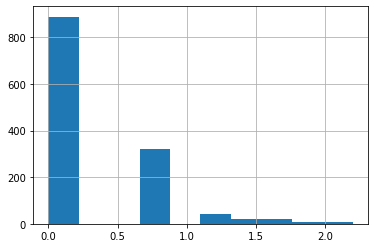

In [33]:
#tried log norm of sibsp(not used)
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

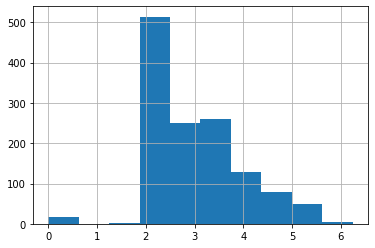

In [34]:
#log norm of fare
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

In [35]:
#converted fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

#created dummy variables from categories (we can also use one hot encoding)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiples','numeric_ticket','name_title','train_test']])

In [36]:
#Split train test again
X_train = all_dummies[all_dummies.train_test==1].drop(['train_test'], axis=1)
X_test = all_dummies[all_dummies.train_test==0].drop(['train_test'], axis=1)

In [37]:
y_train = all_data[all_data.train_test==1].Survived
y_train.shape

(889,)

In [38]:
#Scale Data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]=scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test==1].drop(['train_test'],axis=1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test==0].drop(['train_test'],axis=1)
y_train = all_data[all_data.train_test==1].Survived

# Model Building(Baseline Validation Performance)

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [40]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [41]:
lr = LogisticRegression(max_iter=2000)
cv = cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.80898876 0.80337079 0.82022472 0.85310734]
0.8211832666793626


In [42]:
dt =tree.DecisionTreeClassifier(random_state=1)
cv = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.74719101 0.74157303 0.80898876 0.75280899 0.81920904]
0.7739541674601662


In [43]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.80898876 0.80337079 0.81460674 0.83050847]
0.8054275376118835


In [44]:
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79775281 0.79213483 0.83146067 0.80337079 0.85310734]
0.8155652891512728


In [45]:
rf = RandomForestClassifier(random_state=1)
cv = cross_val_score(rf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81460674 0.78651685 0.85393258 0.73033708 0.84180791]
0.8054402336062972


In [46]:
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.78651685 0.85393258 0.73033708 0.84180791]
0.8065638291119152


In [47]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.84831461 0.82022472 0.8258427  0.80337079 0.86440678]
0.8324319177299563


In [48]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1,use_label_encoder=False)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[22:43:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [49]:
#voting classifier takes all of the inputs and average the results
# 2 kinds of voting classifier: soft and hard
#For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators =[('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc)],voting='soft')

In [50]:
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80337079 0.81460674 0.8258427  0.79775281 0.83615819]
0.8155462451596522


In [51]:
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId':testing.PassengerId,'Survived':y_hat_base_vc}
base_submission= pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv',index=False)

# Model Tuned Performance

After getting the baselines, let's see if we can improve on the indivdual model results!I mainly used grid search to tune the models. I also used Randomized Search for the Random Forest and XG boosted model to simplify testing time.

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [53]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: '+str(classifier.best_score_))
    print('Best Parameters: '+ str(classifier.best_params_))

In [55]:
lr=LogisticRegression()
param_grid = {'max_iter' : [2000],
             'penalty':['l1','l2'],
             'C':np.logspace(-4,4,20),
             'solver':['liblinear']}
clf_lr = GridSearchCV(lr, param_grid=param_grid,cv=5, verbose=True,n_jobs=-1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.2s


Logistic Regression
Best Score: 0.8268075922046594
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    7.1s finished


In [58]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[3,5,7,9],
             'weights':['uniform','distance'],
             'algorithm':['auto','ball_tree','kd_tree'],
             'p':[1,2]}
clf_knn = GridSearchCV(knn,param_grid=param_grid,cv=5,verbose=True,n_jobs=-1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.2s


KNN
Best Score: 0.8301720307243065
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    7.2s finished


In [60]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed:  6.5min finished


SVC
Best Score: 0.8324319177299563
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [61]:
#Because the total feature space is so large, I used a randomized search to narrow down the paramters for the model. I took the best model from this and did a more granular search 
"""
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')"""

"\nrf = RandomForestClassifier(random_state = 1)\nparam_grid =  {'n_estimators': [100,500,1000], \n                                  'bootstrap': [True,False],\n                                  'max_depth': [3,5,10,20,50,75,100,None],\n                                  'max_features': ['auto','sqrt'],\n                                  'min_samples_leaf': [1,2,4,10],\n                                  'min_samples_split': [2,5,10]}\n                                  \nclf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)\nbest_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled,y_train)\nclf_performance(best_clf_rf_rnd,'Random Forest')"

In [62]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 20.4min finished


Random Forest
Best Score: 0.8358027042468101
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


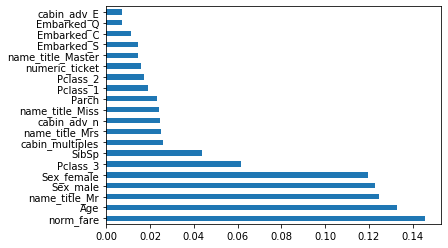

In [63]:
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [64]:
"""xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}

#clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
#best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
#clf_performance(best_clf_xgb,'XGB')
clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb_rnd,'XGB')"""

"xgb = XGBClassifier(random_state = 1)\n\nparam_grid = {\n    'n_estimators': [20, 50, 100, 250, 500,1000],\n    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],\n    'max_depth': [2, 5, 10, 15, 20, 25, None],\n    'reg_alpha': [0, 0.5, 1],\n    'reg_lambda': [1, 1.5, 2],\n    'subsample': [0.5,0.6,0.7, 0.8, 0.9],\n    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],\n    'gamma':[0,.01,.1,1,10,100],\n    'min_child_weight':[0,.01,0.1,1,10,100],\n    'sampling_method': ['uniform', 'gradient_based']\n}\n\n#clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)\n#best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)\n#clf_performance(best_clf_xgb,'XGB')\nclf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)\nbest_clf_xgb_rnd = clf_xgb_rnd.fit(X_train_scaled,y_train)\nclf_performance(best_clf_xgb_rnd,'XGB')"

In [ ]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.5min


In [ ]:
y_hat_xgb = best_clf_xgb.best_estimator_.predict(X_test_scaled).astype(int)
xgb_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_xgb}
submission_xgb = pd.DataFrame(data=xgb_submission)
submission_xgb.to_csv('xgb_submission3.csv', index=False)